(0, 725.068018844456) ,slope= -0.08748866352592401


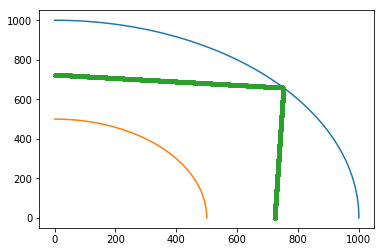

(723.003714197409, 0)
Out Angle: 2.498931767892217 Corrected Length: 23532.150033930542


In [93]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
R1=1000 #大圓半徑
R2=500  #小圓半徑
n1 = 1.48
n2 = 1
critheta = math.asin(n2/n1)
Thetas=[]

###
ina=5#incident angle
w=R1-R2#diameter of optical fiber 
L=6000#distance from source to turn
import math 
x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
num=(L-(w/2)*(1/math.tan(math.radians(ina))))//(w*(1/math.tan(math.radians(ina))))#reflection number
if num%2==1:
    x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
    y=x*math.tan(math.radians(ina))+R2
    m=math.tan(math.radians(ina))
    x=0     
    print((x,y),",slope=",m)
else:
    x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
    y=w-(x*math.tan(math.radians(ina)))+R2
    m=-math.tan(math.radians(ina))
    x=0     
    print((x,y),",slope=",m)
###


#x=0     #起始座標設定
#y=750
#m=0.3

C1=0    #常數
L_L=1
B=0

n_2=y   #優化設定
n_1=x
A=[]
X=[]
Y=[]
K=[]
Test_x=x
Test_y=y
t=math.atan(m) #斜率與正向X軸的角度

Q=np.linspace(0,1.57,1000) #畫參考光纖管
V1_x=1000*np.cos(Q)
V1_y=1000*np.sin(Q)
V2_x=500*np.cos(Q)
V2_y=500*np.sin(Q)

while B<=30:  #畫路徑
    Test_x=x+L_L*1/((abs(m)**2+1)**(1/2))
    Test_y=m*(Test_x-n_1)+n_2
    if (Test_y**2+Test_x**2)**(1/2)>R1 or (Test_y**2+Test_x**2)**(1/2)<R2:
        L_L=L_L*(-1)
    while (y**2+x**2)**(1/2)<=(R1+C1) and (y**2+x**2)**(1/2)>=(R2-C1):
        x+=L_L*0.1/((abs(m)**2+1)**(1/2))
        y=m*(x-n_1)+n_2
        X.append(x)
        Y.append(y)
        if Y[-1]<0:
            break
        K.append((y**2+x**2)**(1/2))
        if (y**2+x**2)**(1/2)<=R1 and (y**2+x**2)**(1/2)>=R2:
            C1=0
    p_m=-x/y  #球的平面斜率
    n_2=y
    n_1=x
    C1=10
    theta=math.atan((m-p_m)/(1+m*p_m))  #求2斜率者間的角度
    T=math.pi/2-abs(theta)
    Thetas.append(T)
    if Thetas[-1]<critheta:
        break
    t=t-2*theta
    m=math.tan(t)
    B+=1
    if Y[-1]<0:
        break
    A.append(m)

#print(m)
#print(A)
#print(T)
#print(t)    
#print(x,y)
#print(X)
#print(Y)
plt.plot(V1_x,V1_y) #畫圖
plt.plot(V2_x,V2_y)
plt.plot(X,Y,'.')    
plt.show()

Last_point=(X[-1],Y[-1])
function_line=y-Y[-1]-A[-1]*(x-X[-1])
x_n_point=(-Y[-1]/A[-1])+X[-1]
new_point=(x_n_point,0)
print(new_point)
###
mLast=A[-1]
a=x_n_point
r2=R2
(a,0),mLast #get me
nx=0 #new coordinate
ny=a-r2 
nm=-1/m

if nm>0:
    OutAngle=math.degrees(math.atan(nm))
    CorrectedLength=(w-ny)*(1/math.tan(math.radians(OutAngle)))+w*(1/math.tan(math.radians(OutAngle)))/2*3
else:
    OutAngle=math.degrees(math.atan(-nm))
    CorrectedLength=ny*(1/math.tan(math.radians(OutAngle)))+w*(1/math.tan(math.radians(OutAngle)))/2
    
print("Out Angle:",OutAngle,"Corrected Length:",CorrectedLength)

In [94]:
print(y)

-0.08288354084561433
